In [1]:
import sys

sys.path.append("../libs")

In [2]:
import pandas as pd

df = pd.read_parquet('../data/lending_club_case_train_dataset.parquet')

In [3]:
print(f"Dataframe with {len(df.columns)} features {len(df)} rows")

Dataframe with 142 features 1765426 rows


## Handling null data

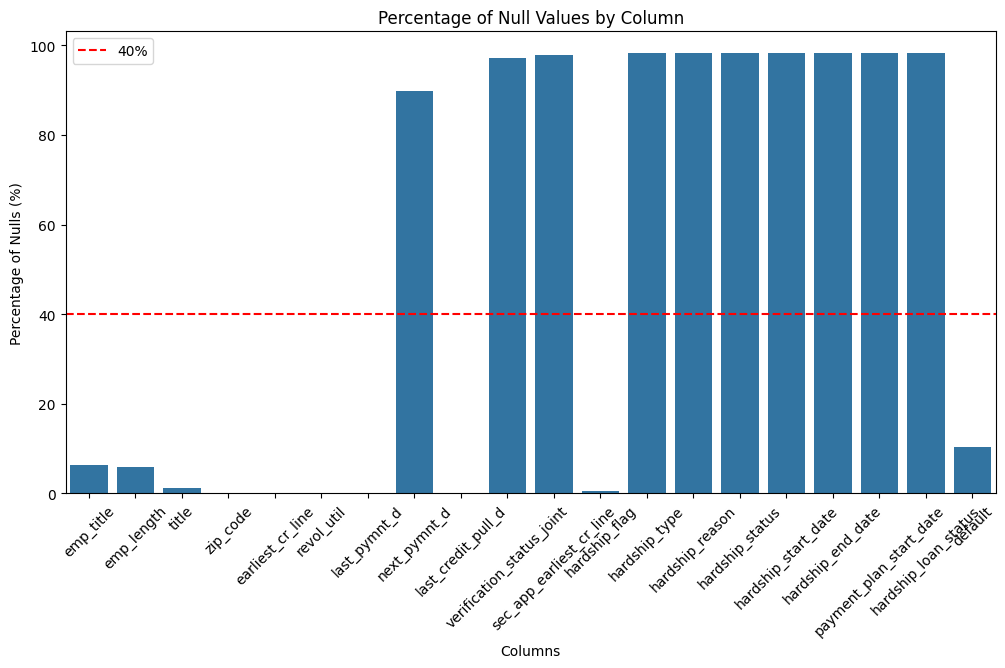

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

null_percentage = df.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentage.index, y=null_percentage.values)
plt.axhline(40, color='red', linestyle='--', label='40%')
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Percentage of Nulls (%)')
plt.title('Percentage of Null Values by Column')
plt.legend()
plt.show()

We will remove columns that have more than 40% missing values, this will free up space and make processing faster.


### Remove constants features

In [5]:
threshold = 40
columns_to_drop = null_percentage[null_percentage > threshold].index
df = df.drop(columns=columns_to_drop)

print(df.columns)
print(f"Dataframe with {len(df.columns)} features {len(df)} rows")

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_flag', 'deferral_term', 'hardship_amount', 'hardship_length',
       'hardship_dpd', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'default'],
      dtype='object', length=132)
Dataframe with 132 features 1765426 rows


The **policy_code** and **pymnt_plan** features will be excluded from the dataset, as they only have one value and are not useful for our analysis.

In [6]:
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]

df = df.drop(columns=columns_to_drop)

print(f"Columns excluded {','.join(columns_to_drop)}")
print(f"Dataframe with {len(df.columns)} features {len(df)} rows")

Columns excluded pymnt_plan,policy_code
Dataframe with 130 features 1765426 rows


### Remove features irrelevants
These features are not relevant for analysis, most of the features are text or identifier fields, so we will discard them.

- id
- url
- member_id
- zip_code
- desc
- emp_title
- title
- issue_d
- last_credit_pull_d,
- earliest_cr_line


In [7]:
irrelevant_features = [
    "id",
    "url",
    "zip_code",
    "emp_title",
    "title",
    "issue_d",
    "last_credit_pull_d",
    "earliest_cr_line"
]
df = df.drop(columns=irrelevant_features)
print(f"Dataframe with {len(df.columns)} features {len(df)} rows")

Dataframe with 122 features 1765426 rows


### Dealing with data leaks
The following features were removed the following features because they could
have caused leakage of data.

In [8]:
features_with_data_leakes = [
    "last_pymnt_d",
    "last_pymnt_amnt",
    "recoveries",
    "collection_recovery_fee",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "funded_amnt",
    "funded_amnt_inv",
]

df = df.drop(columns=features_with_data_leakes)

print(f"Dataframe with {len(df.columns)} features {len(df)} rows")

Dataframe with 109 features 1765426 rows


### Remove policies features.

LC Assigned Loan Grade refers to the risk rating assigned by LendingClub to a loan based on the borrower's profile. This grade is used in credit policies and as we will create our own policy, we will remove these features.

In [9]:
features_to_drop = ["grade", "sub_grade"]

df = df.drop(columns=features_to_drop)

print(f"Dataframe with {len(df.columns)} features {len(df)} rows")

Dataframe with 107 features 1765426 rows


In [10]:
from feature_dataset import FeatureDataset

fs = FeatureDataset("../data/feature_store.db")


In [11]:
fs.create_feature_dataset("lending_club_cleaned", dataset=df)

In [33]:
categorical_features = df.select_dtypes(include=['category'])
numerical_features = df.select_dtypes(exclude=['category']).drop('default',axis=1)
print('categorical features:\n {0}'.format(", \n ".join(list(categorical_features.columns))))
print("")
print('numerical features:\n {0}'.format(", \n ".join(list(numerical_features.columns))))


categorical features:
 emp_length, 
 home_ownership, 
 verification_status, 
 loan_status, 
 purpose, 
 addr_state, 
 initial_list_status, 
 application_type, 
 hardship_flag, 
 debt_settlement_flag

numerical features:
 loan_amnt, 
 term, 
 int_rate, 
 installment, 
 annual_inc, 
 dti, 
 delinq_2yrs, 
 fico_range_low, 
 fico_range_high, 
 inq_last_6mths, 
 mths_since_last_delinq, 
 mths_since_last_record, 
 open_acc, 
 pub_rec, 
 revol_bal, 
 revol_util, 
 total_acc, 
 last_fico_range_high, 
 last_fico_range_low, 
 collections_12_mths_ex_med, 
 mths_since_last_major_derog, 
 annual_inc_joint, 
 dti_joint, 
 acc_now_delinq, 
 tot_coll_amt, 
 tot_cur_bal, 
 open_acc_6m, 
 open_act_il, 
 open_il_12m, 
 open_il_24m, 
 mths_since_rcnt_il, 
 total_bal_il, 
 il_util, 
 open_rv_12m, 
 open_rv_24m, 
 max_bal_bc, 
 all_util, 
 total_rev_hi_lim, 
 inq_fi, 
 total_cu_tl, 
 inq_last_12m, 
 acc_open_past_24mths, 
 avg_cur_bal, 
 bc_open_to_buy, 
 bc_util, 
 chargeoff_within_12_mths, 
 delinq_amnt, 

categorical features:
 emp_length, 
 home_ownership, 
 verification_status, 
 loan_status, 
 purpose, 
 addr_state, 
 initial_list_status, 
 application_type, 
 hardship_flag, 
 debt_settlement_flag

numerical features:
 loan_amnt, 
 term, 
 int_rate, 
 installment, 
 annual_inc, 
 dti, 
 delinq_2yrs, 
 fico_range_low, 
 fico_range_high, 
 inq_last_6mths, 
 mths_since_last_delinq, 
 mths_since_last_record, 
 open_acc, 
 pub_rec, 
 revol_bal, 
 revol_util, 
 total_acc, 
 last_fico_range_high, 
 last_fico_range_low, 
 collections_12_mths_ex_med, 
 mths_since_last_major_derog, 
 annual_inc_joint, 
 dti_joint, 
 acc_now_delinq, 
 tot_coll_amt, 
 tot_cur_bal, 
 open_acc_6m, 
 open_act_il, 
 open_il_12m, 
 open_il_24m, 
 mths_since_rcnt_il, 
 total_bal_il, 
 il_util, 
 open_rv_12m, 
 open_rv_24m, 
 max_bal_bc, 
 all_util, 
 total_rev_hi_lim, 
 inq_fi, 
 total_cu_tl, 
 inq_last_12m, 
 acc_open_past_24mths, 
 avg_cur_bal, 
 bc_open_to_buy, 
 bc_util, 
 chargeoff_within_12_mths, 
 delinq_amnt, 

As we can see, we have 10 categorical variables and we will analyze them to see how much they impact our target variable.

Meaning of each categorical variable:

- **initial_list_status**: The initial listing status of the loan. Possible values are – W (Whole), F (Fractional)
- **application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- **hardship_flag**: Flags whether or not the borrower is on a hardship plan
- **debt_settlement_flag**: Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.
- **verification_status**: Indicates if income was verified by LC, not verified, or if the income source was verified
- **home_ownership**: The home ownership status provided by the borrower during registration or obtained from the credit report.
- **loan_status**: Current status of the loan
- **emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **purpose**: A category provided by the borrower for the loan request.
- **addr_state**: The state provided by the borrower in the loan application

In [39]:
(
    pd.DataFrame(
        list({col: df[col].nunique() for col in categorical_features}.items()),
        columns=["feature", "unique_count"],
    )
    .sort_values(by="unique_count")
    .reset_index(drop=True)
)

,feature,unique_count
0,initial_list_status,2
1,application_type,2
2,hardship_flag,2
3,debt_settlement_flag,2
4,verification_status,3
5,home_ownership,6
6,loan_status,9
7,emp_length,11
8,purpose,14
9,addr_state,51


In [43]:
import numpy as np
def process_categorical_columns(df, categorical_cols, target_col, woe_table=None, iv_summary=None, append=False):
    """
    Calculate WoE and IV for given categorical columns, including NaNs as a separate category.

    Args:
        df (pd.DataFrame): Input DataFrame.
        categorical_cols (list): List of categorical column names to process.
        target_col (str): Name of the binary target column (1 = Good, 0 = Bad).
        woe_table (pd.DataFrame): Existing WoE table (required if append=True).
        iv_summary (pd.DataFrame): Existing IV summary (required if append=True).
        append (bool): If True, append results to existing tables.

    Returns:
        woe_table (pd.DataFrame): WoE table with all processed columns.
        iv_summary (pd.DataFrame): IV summary table with all processed columns.
    """
    if append and (woe_table is None or iv_summary is None):
        raise ValueError("Existing tables must be provided when append=True.")

    # Initialize results if not appending
    if not append:
        woe_table = pd.DataFrame()
        iv_summary = pd.DataFrame()

    new_woe_results = []
    new_summary = []

    # Process each categorical column
    for col in categorical_cols:
        # Handle NaN values by creating a separate 'NaN' category
        #df[col] = df[col].fillna('NaN')

        # Group by the column to calculate metrics
        stats = df.groupby(col).agg(
            event_count=(target_col, 'sum'),
            total_count=(target_col, 'count')
        ).reset_index()

        # Calculate non-event count and proportions
        stats['non_event_count'] = stats['total_count'] - stats['event_count']
        total_events = stats['event_count'].sum()
        total_non_events = stats['non_event_count'].sum()

        # Avoid division by zero
        stats['event_rate'] = stats['event_count'] / (total_events + 1e-6)
        stats['non_event_rate'] = stats['non_event_count'] / (total_non_events + 1e-6)

        # Calculate WoE
        stats['woe'] = np.log((stats['non_event_rate'] + 1e-6) / (stats['event_rate'] + 1e-6))

        # Calculate IV for each category
        stats['iv'] = (stats['non_event_rate'] - stats['event_rate']) * stats['woe']

        # Compute total IV for the column
        total_iv = stats['iv'].sum()

        # Add column name and rename for desired format
        stats['name'] = col  # Add column name
        stats.rename(columns={col: 'sub_name'}, inplace=True)  # Rename column to 'sub_name'

        # Reorder columns
        stats = stats[['name', 'sub_name', 'event_count', 'total_count', 'non_event_count',
                       'event_rate', 'non_event_rate', 'woe', 'iv']]

        # Append results
        new_woe_results.append(stats)
        new_summary.append({'Column': col, 'IV': total_iv})

    # Combine results with existing tables if appending
    new_woe_table = pd.concat(new_woe_results, ignore_index=True)
    new_iv_summary = pd.DataFrame(new_summary).sort_values(by='IV', ascending=False)

    if append:
        woe_table = pd.concat([woe_table, new_woe_table], ignore_index=True)
        iv_summary = pd.concat([iv_summary, new_iv_summary], ignore_index=True).sort_values(by='IV', ascending=False)
    else:
        woe_table = new_woe_table
        iv_summary = new_iv_summary

    return woe_table, iv_summary

In [44]:
woe_table, iv_summary = process_categorical_columns(df, categorical_features, 'default')
iv_summary

/var/folders/tc/7v_6yrg96fgdxwydpsmdqhz40000gn/T/ipykernel_41377/2363910058.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(col).agg(
/var/folders/tc/7v_6yrg96fgdxwydpsmdqhz40000gn/T/ipykernel_41377/2363910058.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(col).agg(
/var/folders/tc/7v_6yrg96fgdxwydpsmdqhz40000gn/T/ipykernel_41377/2363910058.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sil

,Column,IV
3,loan_status,27.631023
9,debt_settlement_flag,1.461311
2,verification_status,0.047089
1,home_ownership,0.026070
4,purpose,0.017978
5,addr_state,0.013924
7,application_type,0.002386
0,emp_length,0.001516
8,hardship_flag,0.000869
6,initial_list_status,0.000127


In [47]:
woe_table[woe_table.name == 'purpose'].sort_values("iv")

,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
33,purpose,educational,56.0,327,271.0,0.000186,0.000211,0.130153,0.000003
40,purpose,renewable_energy,233.0,1076,843.0,0.000772,0.000658,-0.159803,0.000018
37,purpose,medical,3696.0,18527,14831.0,0.012243,0.011571,-0.056483,0.000038
39,purpose,other,18086.0,92630,74544.0,0.059911,0.058157,-0.029704,0.000052
42,purpose,vacation,1945.0,10965,9020.0,0.006443,0.007037,0.088213,0.000052
35,purpose,house,1661.0,7564,5903.0,0.005502,0.004605,-0.177880,0.000160
36,purpose,major_purchase,6125.0,34643,28518.0,0.020289,0.022249,0.092196,0.000181
38,purpose,moving,2413.0,11128,8715.0,0.007993,0.006799,-0.161760,0.000193
43,purpose,wedding,278.0,2293,2015.0,0.000921,0.001572,0.534348,0.000348
34,purpose,home_improvement,17644.0,104095,86451.0,0.058447,0.067447,0.143223,0.001289
